# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('/content/train.csv')

Data berhasil dimuat!


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
# Menampilkan 5 baris pertama
print("\n--- 5 Baris Pertama ---")
display(df.head())

# Informasi umum tentang tipe data dan nilai non-null
print("\n--- Info Dataset ---")
print(df.info())

# Statistik deskriptif untuk kolom numerik
print("\n--- Statistik Deskriptif (Numerik) ---")
display(df.describe())

# Statistik deskriptif untuk kolom kategorikal
print("\n--- Statistik Deskriptif (Kategorikal) ---")
display(df.describe(include=['O']))

# Cek duplikat
print(f"\nJumlah baris duplikat: {df.duplicated().sum()}")

# Drop kolom 'id' jika ada karena tidak relevan untuk analisis pola
if 'id' in df.columns:
    df = df.drop(columns=['id'])
    print("Kolom 'id' telah dihapus.")


--- 5 Baris Pertama ---


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,28687,29.0,services,single,secondary,no,-205.0,no,no,cellular,30.0,jan,194.0,1.0,-1.0,0.0,unknown,0
1,9305,53.0,blue-collar,married,primary,no,0.0,yes,no,unknown,5.0,jun,285.0,2.0,-1.0,0.0,unknown,0
2,41426,55.0,management,married,NaN,no,2587.0,no,no,cellular,4.0,sep,328.0,2.0,94.0,2.0,success,1
3,44804,30.0,technician,single,tertiary,no,0.0,no,no,cellular,15.0,sep,214.0,2.0,-1.0,0.0,unknown,0
4,5879,30.0,unemployed,married,secondary,no,529.0,yes,yes,unknown,26.0,may,NaN,3.0,-1.0,0.0,unknown,0



--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         36168 non-null  int64  
 1   age        35770 non-null  float64
 2   job        35734 non-null  object 
 3   marital    35698 non-null  object 
 4   education  35662 non-null  object 
 5   default    35625 non-null  object 
 6   balance    35589 non-null  float64
 7   housing    35553 non-null  object 
 8   loan       35517 non-null  object 
 9   contact    35481 non-null  object 
 10  day        35445 non-null  float64
 11  month      35408 non-null  object 
 12  duration   35372 non-null  float64
 13  campaign   35336 non-null  float64
 14  pdays      35300 non-null  float64
 15  previous   35264 non-null  float64
 16  poutcome   35228 non-null  object 
 17  y          36168 non-null  int64  
dtypes: float64(7), int64(2), object(9)
memory usage: 5.0+ MB
None

-

,id,age,balance,day,duration,campaign,pdays,previous,y
count,36168.000000,35770.000000,35589.000000,35445.000000,35372.000000,35336.000000,35300.000000,35264.000000,36168.000000
mean,22547.433477,40.952390,1368.742168,15.801947,258.962484,2.753226,40.148725,0.579543,0.117010
std,13080.477704,10.612638,2980.607071,8.307924,259.005094,3.077914,99.755709,2.374508,0.321436
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,11200.750000,33.000000,74.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,22479.500000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,33891.250000,48.000000,1448.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,45210.000000,95.000000,98417.000000,31.000000,4918.000000,58.000000,854.000000,275.000000,1.000000



--- Statistik Deskriptif (Kategorikal) ---


,job,marital,education,default,housing,loan,contact,month,poutcome
count,35734,35698,35662,35625,35553,35517,35481,35408,35228
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,7720,21521,18340,34988,19734,29837,22923,10824,28792



Jumlah baris duplikat: 0
Kolom 'id' telah dihapus.



=== 2. Missing Values Analysis ===

Jumlah nilai yang hilang per kolom:
poutcome     940
previous     904
pdays        868
campaign     832
duration     796
month        760
day          723
contact      687
loan         651
housing      615
balance      579
default      543
education    506
marital      470
job          434
age          398
dtype: int64


/tmp/ipython-input-2357240562.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")


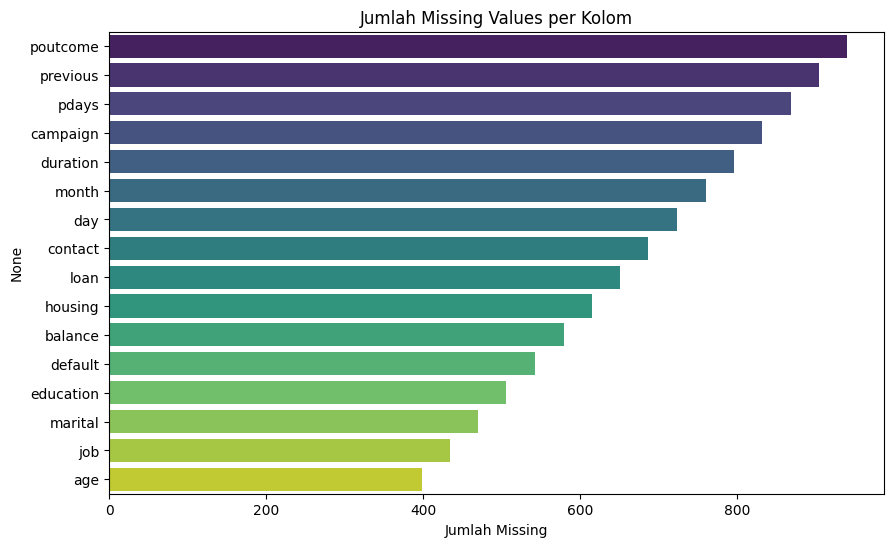

In [4]:
# 2. MISSING VALUES ANALYSIS
print("\n=== 2. Missing Values Analysis ===")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

if not missing_values.empty:
    print("\nJumlah nilai yang hilang per kolom:")
    print(missing_values)

    # Visualisasi Missing Values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_values.values, y=missing_values.index, palette="viridis")
    plt.title("Jumlah Missing Values per Kolom")
    plt.xlabel("Jumlah Missing")
    plt.show()
else:
    print("Tidak ada nilai yang hilang (missing values) dalam dataset.")


=== 3. Univariate Analysis ===


/tmp/ipython-input-3999501541.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='pastel')


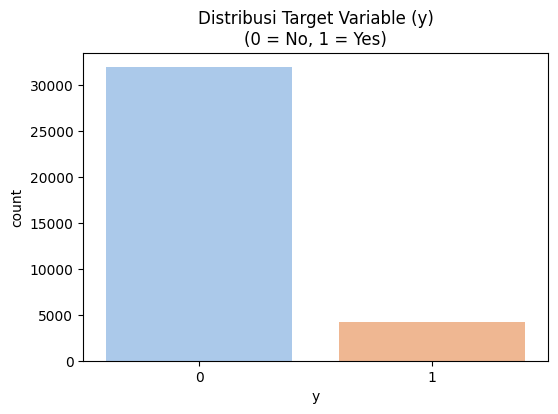

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


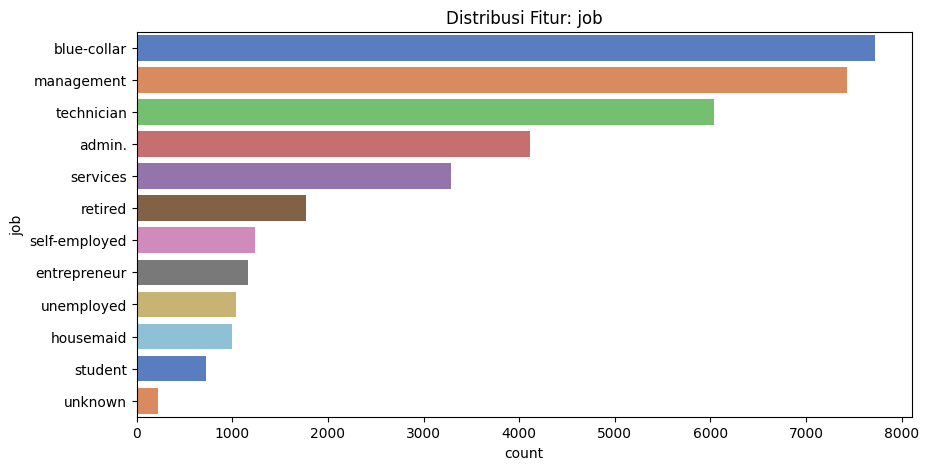

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


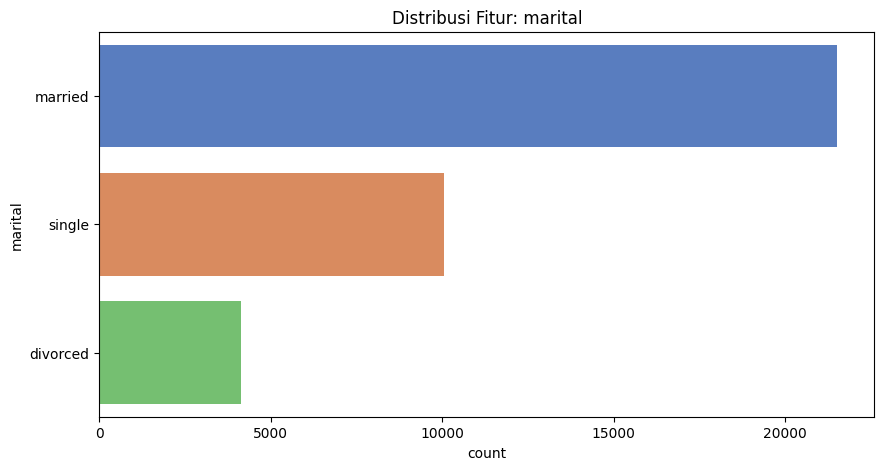

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


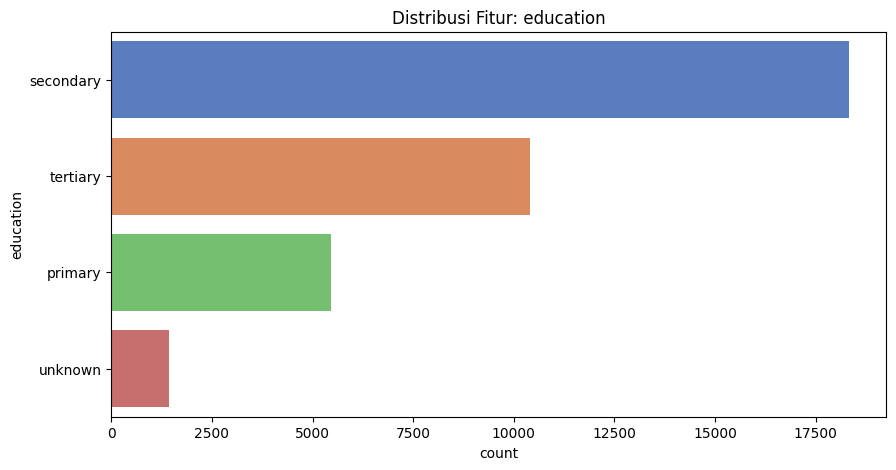

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


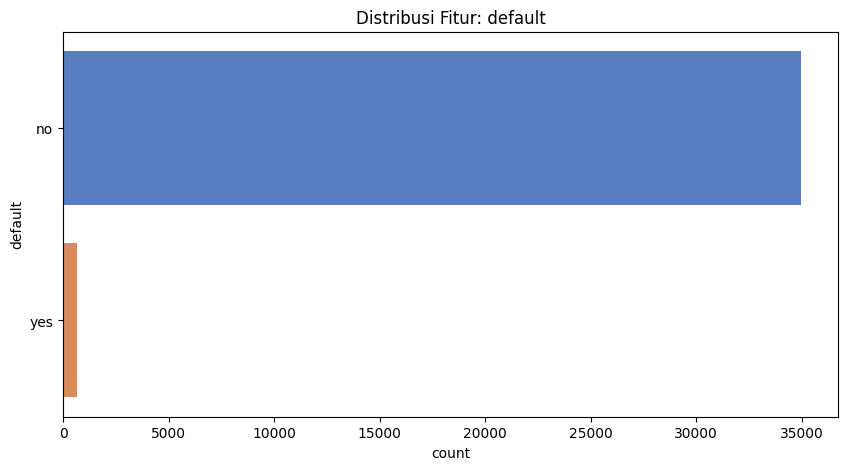

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


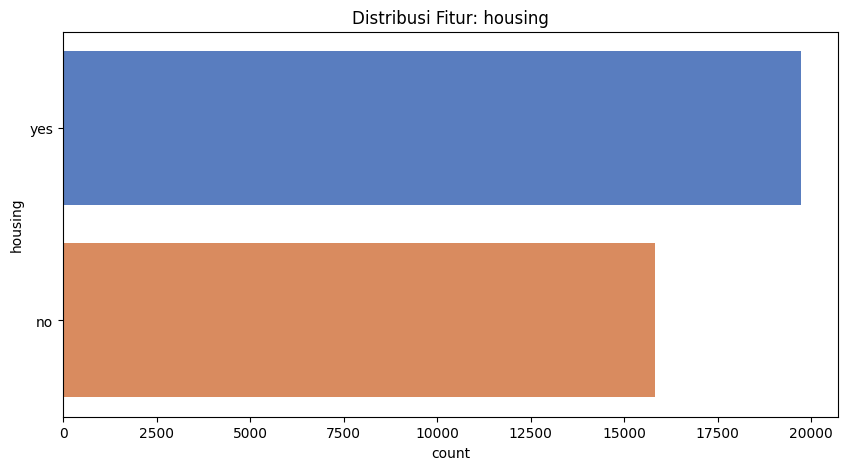

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


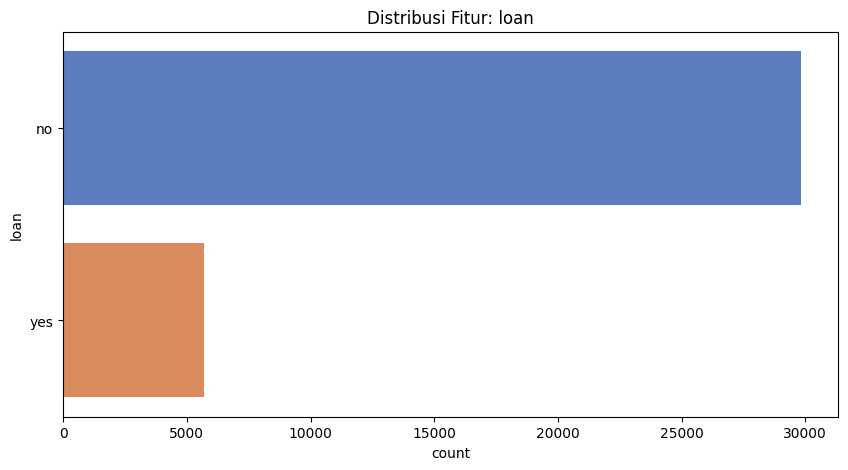

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


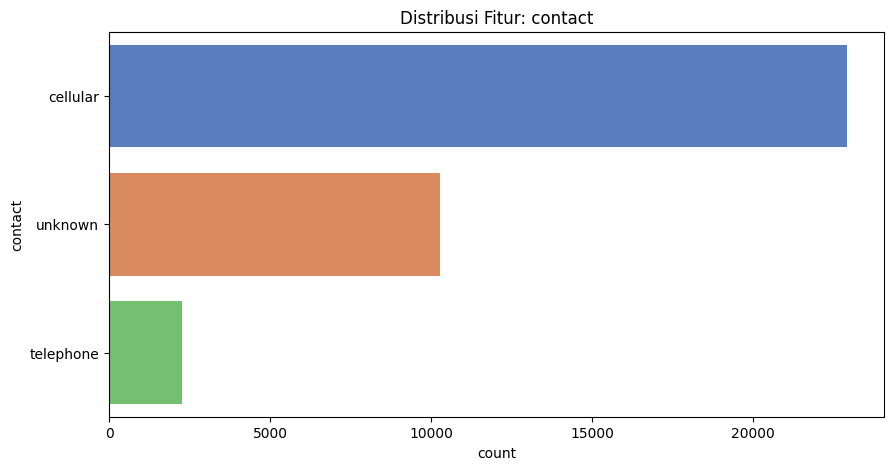

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


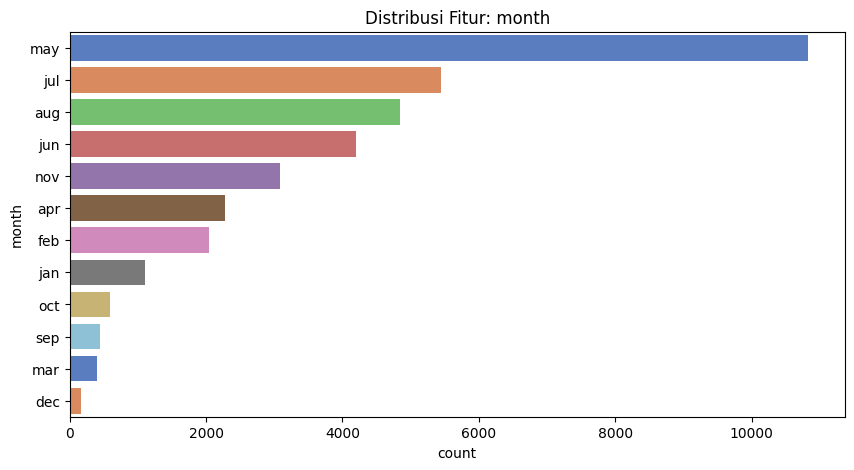

/tmp/ipython-input-3999501541.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')


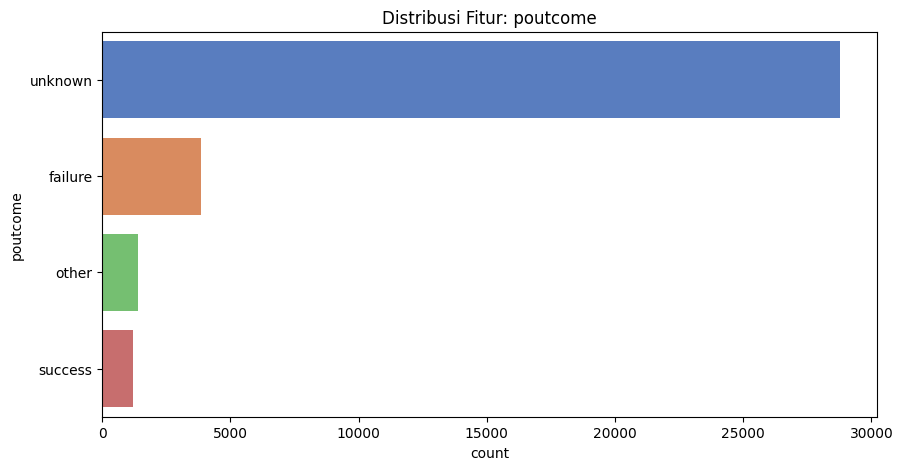

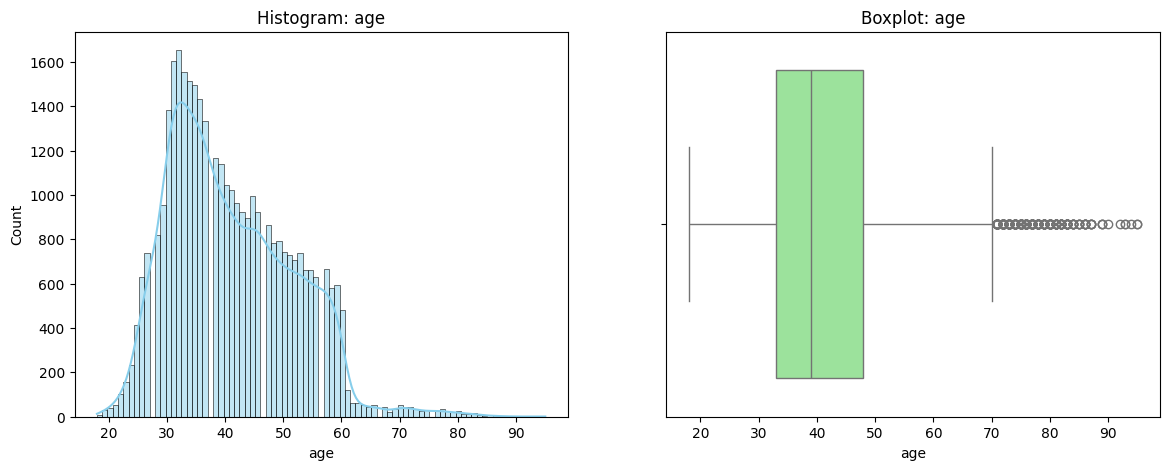

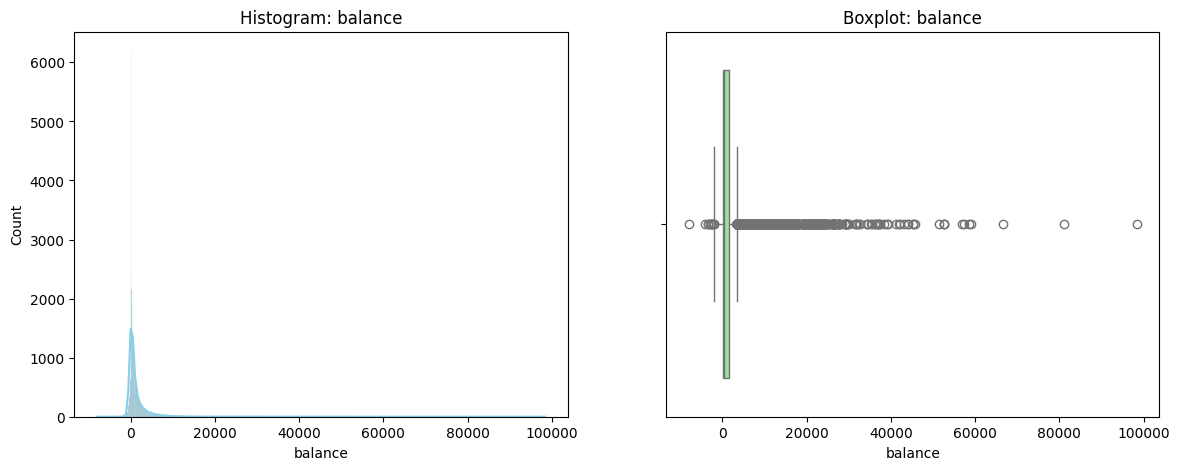

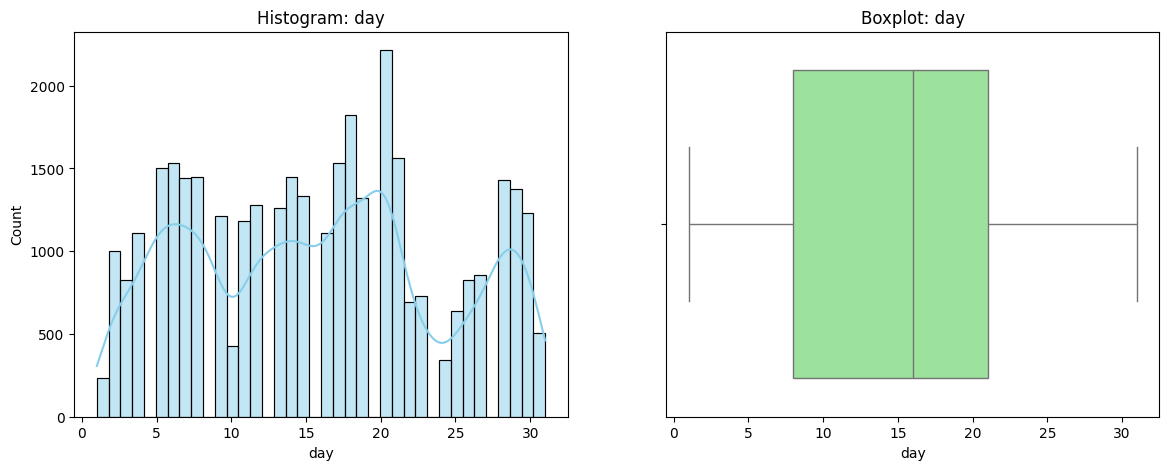

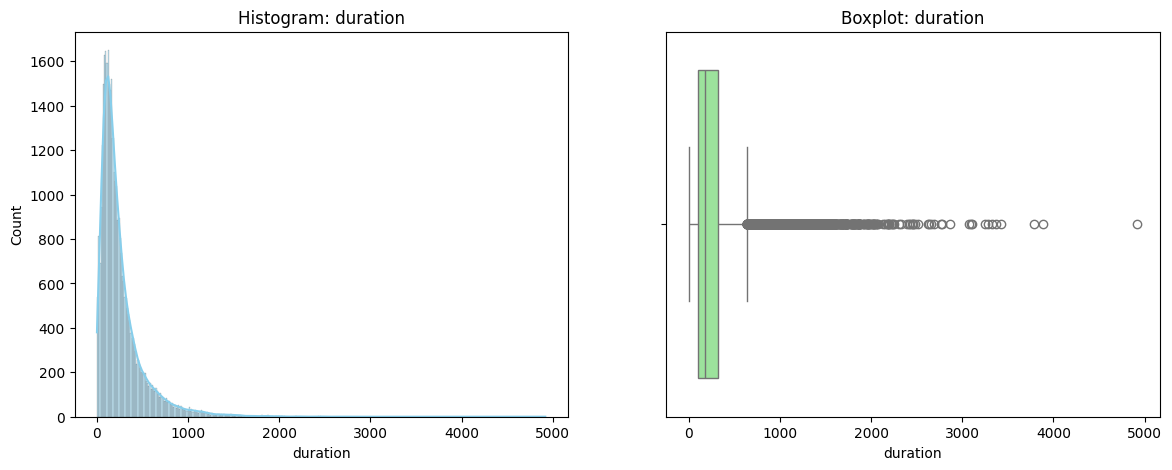

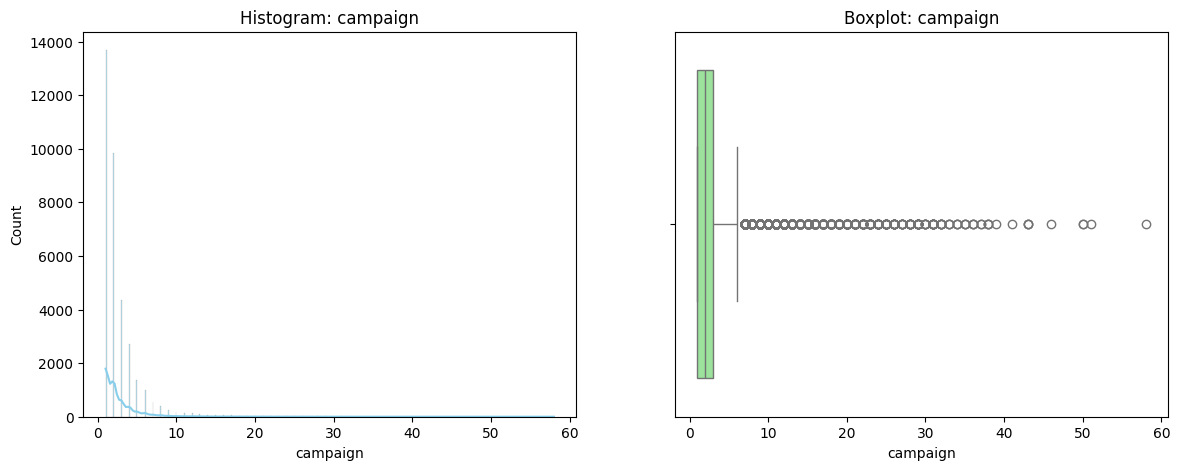

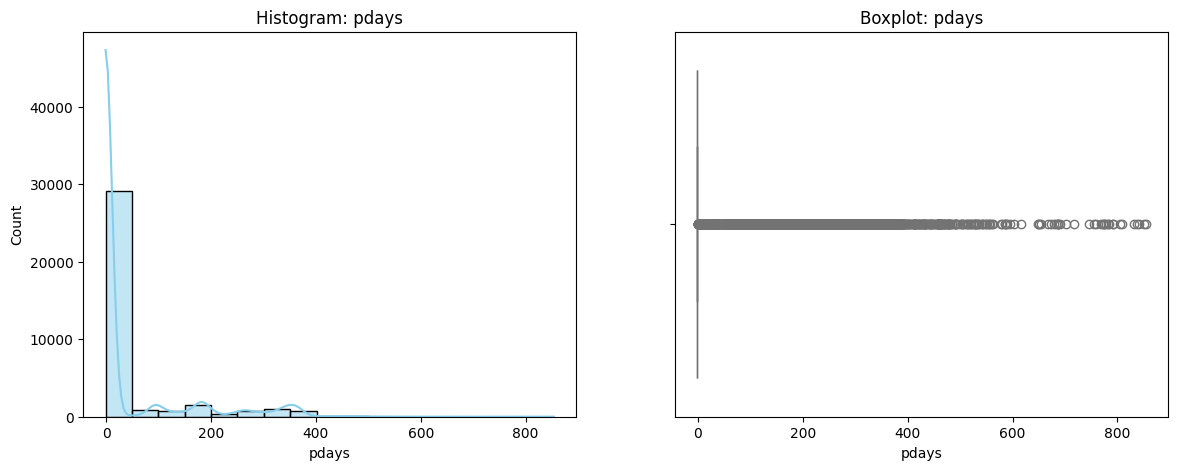

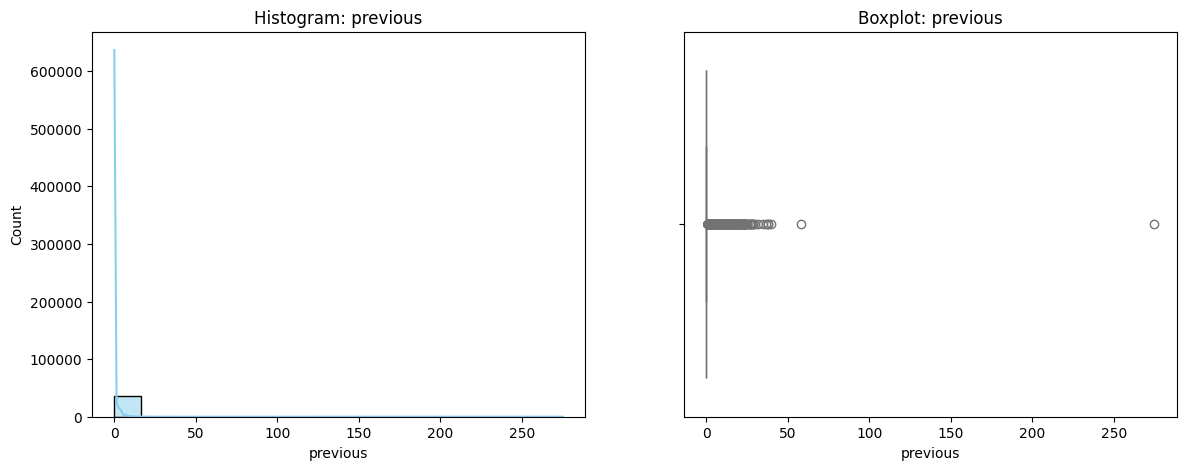

In [5]:
# 3. UNIVARIATE ANALYSIS (Analisis Tiap Kolom)

print("\n=== 3. Univariate Analysis ===")

# --- Target Variable Distribution (y) ---
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df, palette='pastel')
plt.title("Distribusi Target Variable (y)\n(0 = No, 1 = Yes)")
plt.show()

# --- Categorical Features ---
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in cat_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='muted')
    plt.title(f"Distribusi Fitur: {col}")
    plt.show()

# --- Numerical Features (Histogram & Boxplot) ---
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'y' in num_cols: num_cols.remove('y')

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Histogram
    sns.histplot(df[col], kde=True, ax=axes[0], color='skyblue')
    axes[0].set_title(f"Histogram: {col}")

    # Boxplot (untuk melihat outlier)
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f"Boxplot: {col}")

    plt.show()


=== 4. Multivariate Analysis ===


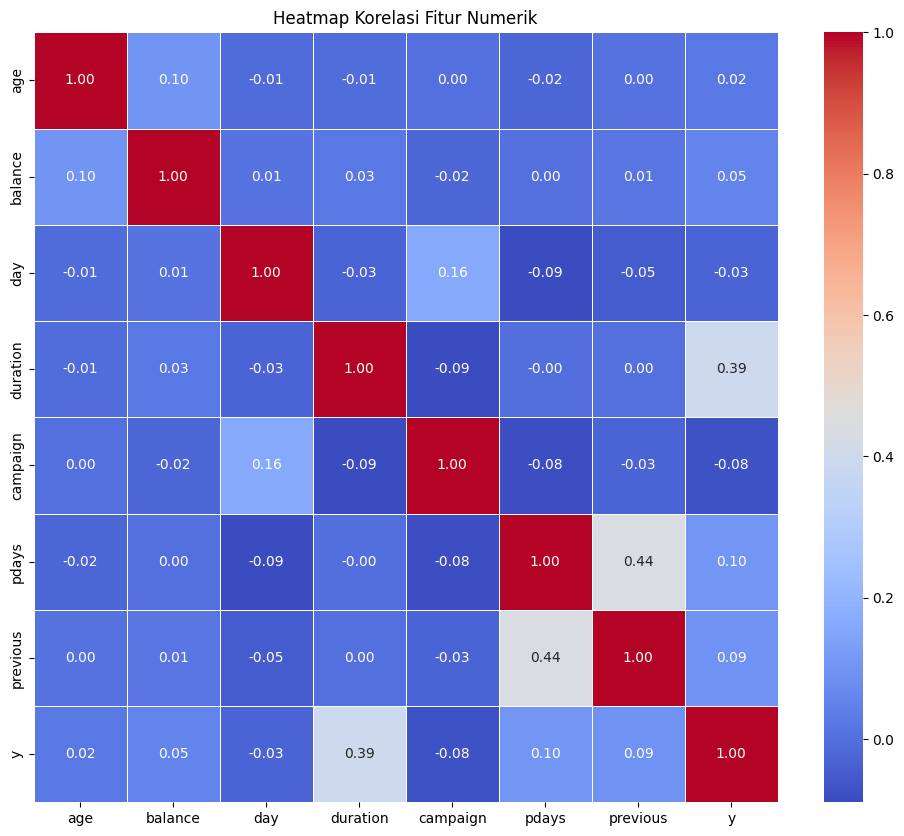

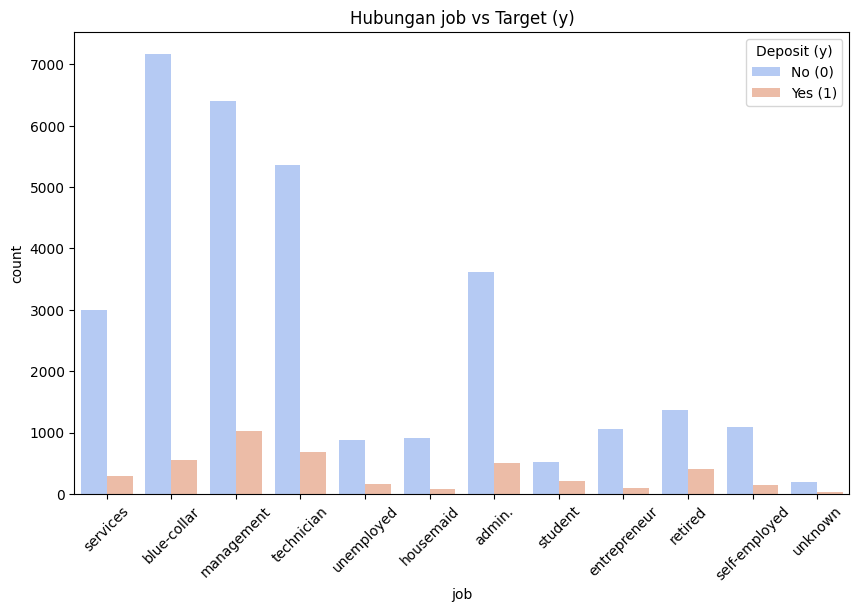

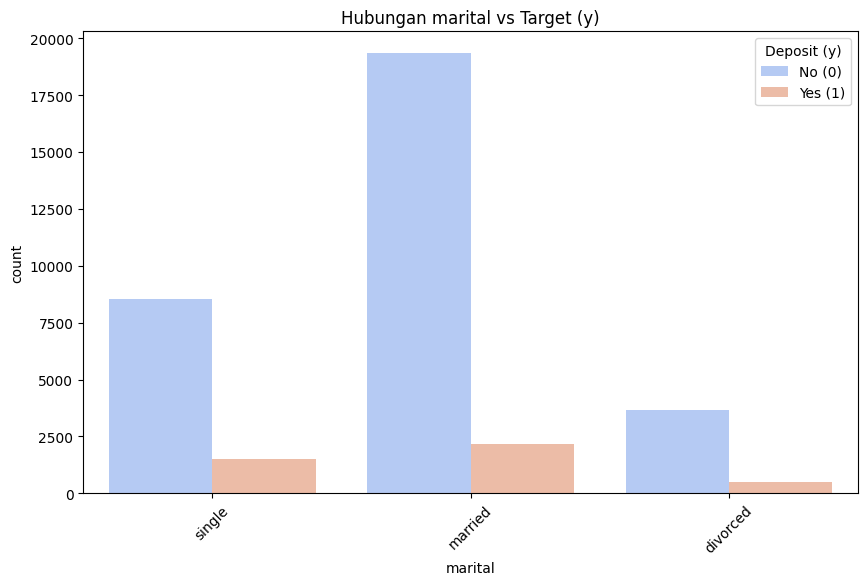

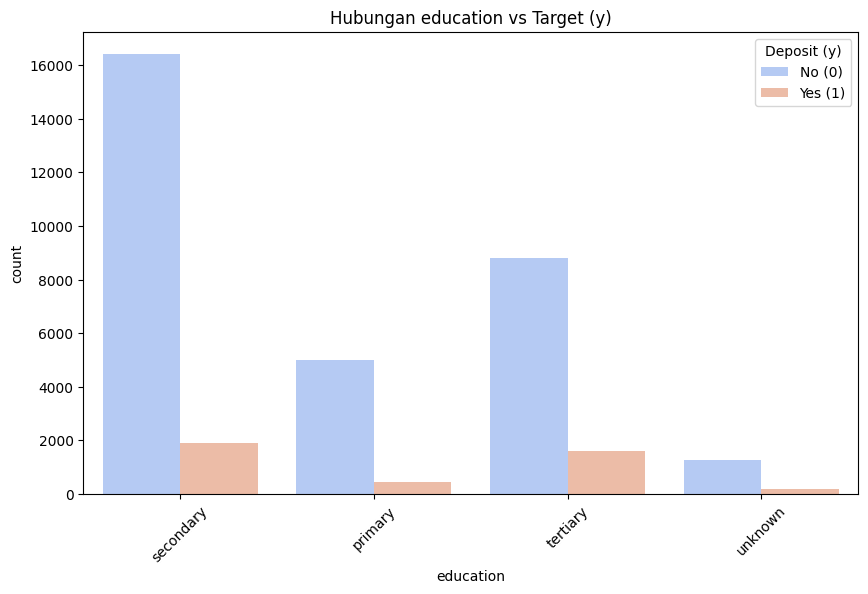

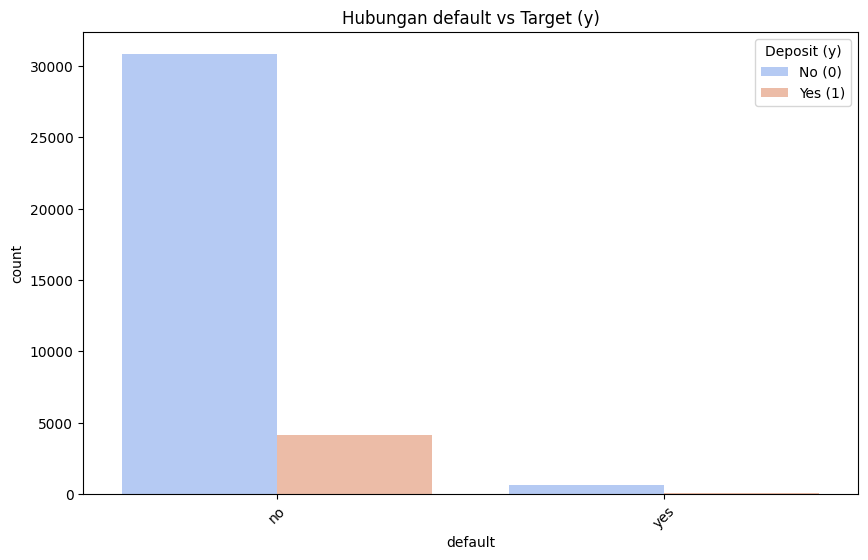

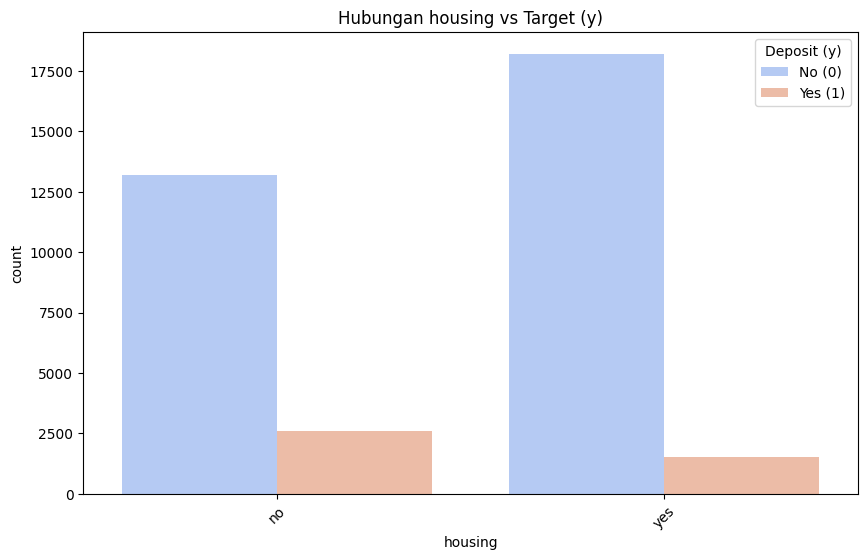

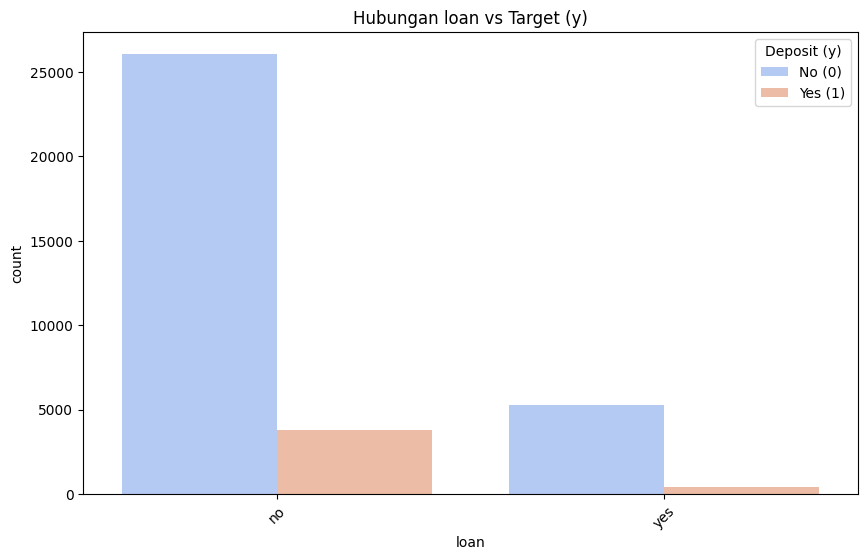

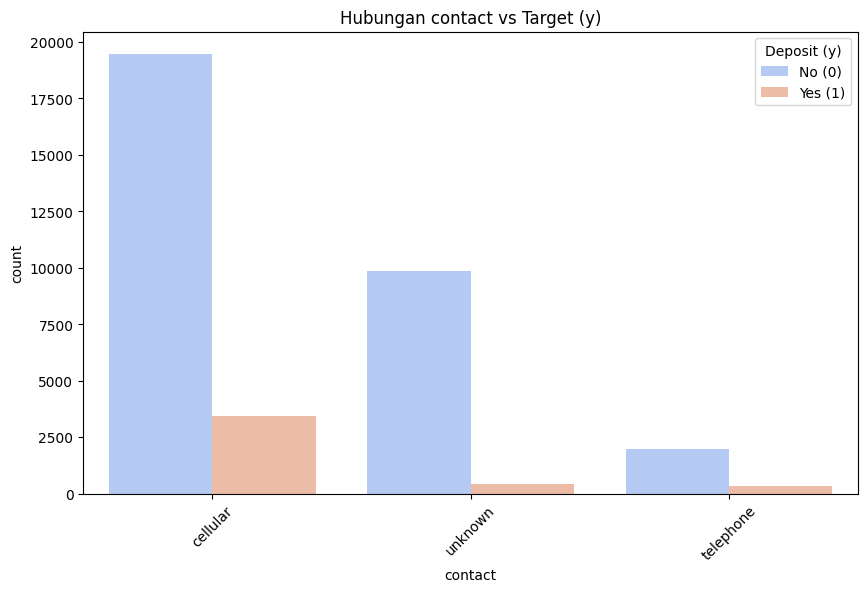

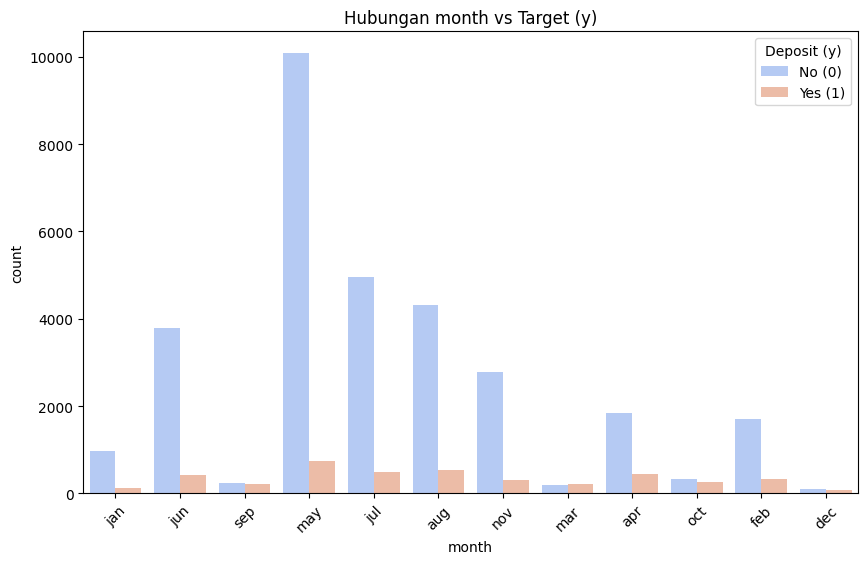

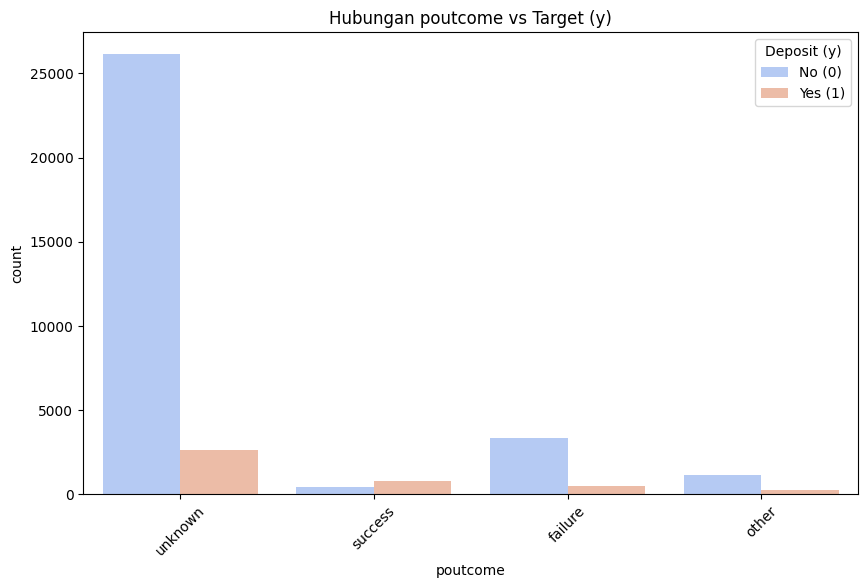

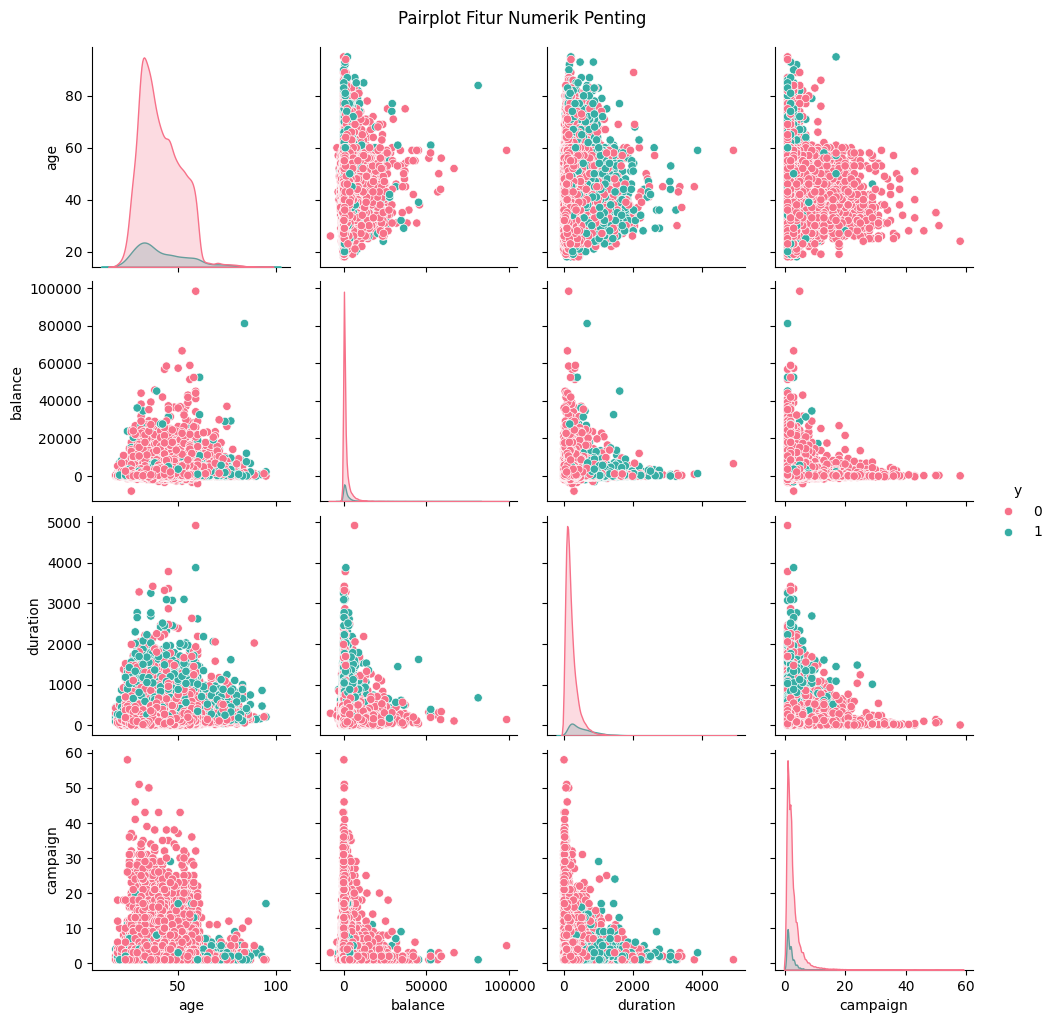

In [6]:
# 4. MULTIVARIATE ANALYSIS (Hubungan Antar Kolom)

print("\n=== 4. Multivariate Analysis ===")

# --- Korelasi Antar Fitur Numerik ---
plt.figure(figsize=(12, 10))
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

# --- Hubungan Categorical Features vs Target (y) ---

for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, hue='y', data=df, palette='coolwarm')
    plt.title(f"Hubungan {col} vs Target (y)")
    plt.xticks(rotation=45)
    plt.legend(title='Deposit (y)', labels=['No (0)', 'Yes (1)'])
    plt.show()

# --- Pairplot untuk beberapa fitur numerik penting ---

important_nums = ['age', 'balance', 'duration', 'campaign', 'y']
sns.pairplot(df[important_nums], hue='y', palette='husl', diag_kind='kde')
plt.suptitle("Pairplot Fitur Numerik Penting", y=1.02)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [7]:


def cap_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_clean[col] = np.clip(df_clean[col], lower, upper)
    return df_clean

def preprocess_full_data(df):
    print("="*40)
    print("   MULAI PREPROCESSING (FULL DATA)   ")
    print("="*40)
    print(f"[1] Data Awal: {df.shape}")

    df_clean = df.copy()

    # 1. Handle Missing Values (Unknown -> NaN)
    df_clean.replace('unknown', np.nan, inplace=True)

    # 2. Encode Target (y)

    target_col = None
    if 'y' in df_clean.columns:
        le = LabelEncoder()
        df_clean['y'] = le.fit_transform(df_clean['y'])
        target_col = df_clean['y']
        df_clean = df_clean.drop('y', axis=1)
        print("[2] Target 'y' di-encode dan dipisahkan sementara.")

    # 3. Manual Ordinal Encoding (Education)
    edu_map = {'primary': 1, 'secondary': 2, 'tertiary': 3}
    if 'education' in df_clean.columns:
        df_clean['education'] = df_clean['education'].map(edu_map)

    # 4. Handle Outliers
    outlier_cols = ['age', 'balance', 'duration', 'campaign']

    exist_outlier_cols = [c for c in outlier_cols if c in df_clean.columns]
    df_clean = cap_outliers(df_clean, exist_outlier_cols)


    num_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
    cat_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

    print(f"[3] Fitur Numerik: {len(num_cols)} | Fitur Kategorikal: {len(cat_cols)}")

    # 6. Pipeline Transformer
    num_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    cat_pipe = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer([
        ('num', num_pipe, num_cols),
        ('cat', cat_pipe, cat_cols)
    ])

    # 7. Eksekusi Transformasi (Fit & Transform seluruh data)
    print("[4] Melakukan transformasi data...")
    X_processed = preprocessor.fit_transform(df_clean)

    # 8. Rekonstruksi DataFrame (Kembalikan nama kolom)
    try:
        ohe_features = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(cat_cols)
        new_columns = num_cols + list(ohe_features)
        df_processed = pd.DataFrame(X_processed, columns=new_columns)
    except:
        df_processed = pd.DataFrame(X_processed)

    # 9. Gabungkan kembali dengan Target (jika ada)
    if target_col is not None:
        df_processed['y'] = target_col.values

    print(f"[5] Selesai. Shape Akhir: {df_processed.shape}")
    print("="*40)

    return df_processed

if __name__ == "__main__":
    try:

        df = pd.read_csv('train.csv')


        df_final = preprocess_full_data(df)

        # Save output
        output_file = 'data_processed.csv'
        df_final.to_csv(output_file, index=False)

        print(f"\n[SUKSES] Data tersimpan di: {output_file}")
        print("Contoh 5 baris data hasil proses:")
        print(df_final.head())

    except FileNotFoundError:
        print("[ERROR] File 'train.csv' tidak ditemukan.")

   MULAI PREPROCESSING (FULL DATA)   
[1] Data Awal: (36168, 18)
[2] Target 'y' di-encode dan dipisahkan sementara.

[INFO] Capping Outlier pada kolom: ['age', 'balance', 'duration', 'campaign']
[3] Fitur Numerik: 9 | Fitur Kategorikal: 8
[4] Melakukan transformasi data...
[5] Selesai. Shape Akhir: (36168, 47)

[SUKSES] Data tersimpan di: data_processed.csv
Contoh 5 baris data hasil proses:
         id       age  education   balance       day  duration  campaign  \
0  0.469375 -1.147736  -0.211126 -0.964544  1.725852 -0.229552 -0.874227   
1 -1.012395  1.173858  -1.753755 -0.791507 -1.313884  0.290233 -0.239332   
2  1.443283  1.367325  -0.211126  1.392137 -1.435474  0.535845 -0.239332   
3  1.701534 -1.051003   1.331502 -0.791507 -0.097990 -0.115314 -0.239332   
4 -1.274316 -1.051003  -0.211126 -0.344987  1.239494 -0.309519  0.395563   

      pdays  previous  job_admin.  ...  month_jun  month_mar  month_may  \
0 -0.406691 -0.240823         0.0  ...        0.0        0.0        0.0   